In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn import preprocessing

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
outcomes = df['Outcome']

In [6]:
outcomes.describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [7]:
# df = df.drop(columns = 'Outcome');

C:\Users\ACER\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ACER\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ACER\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


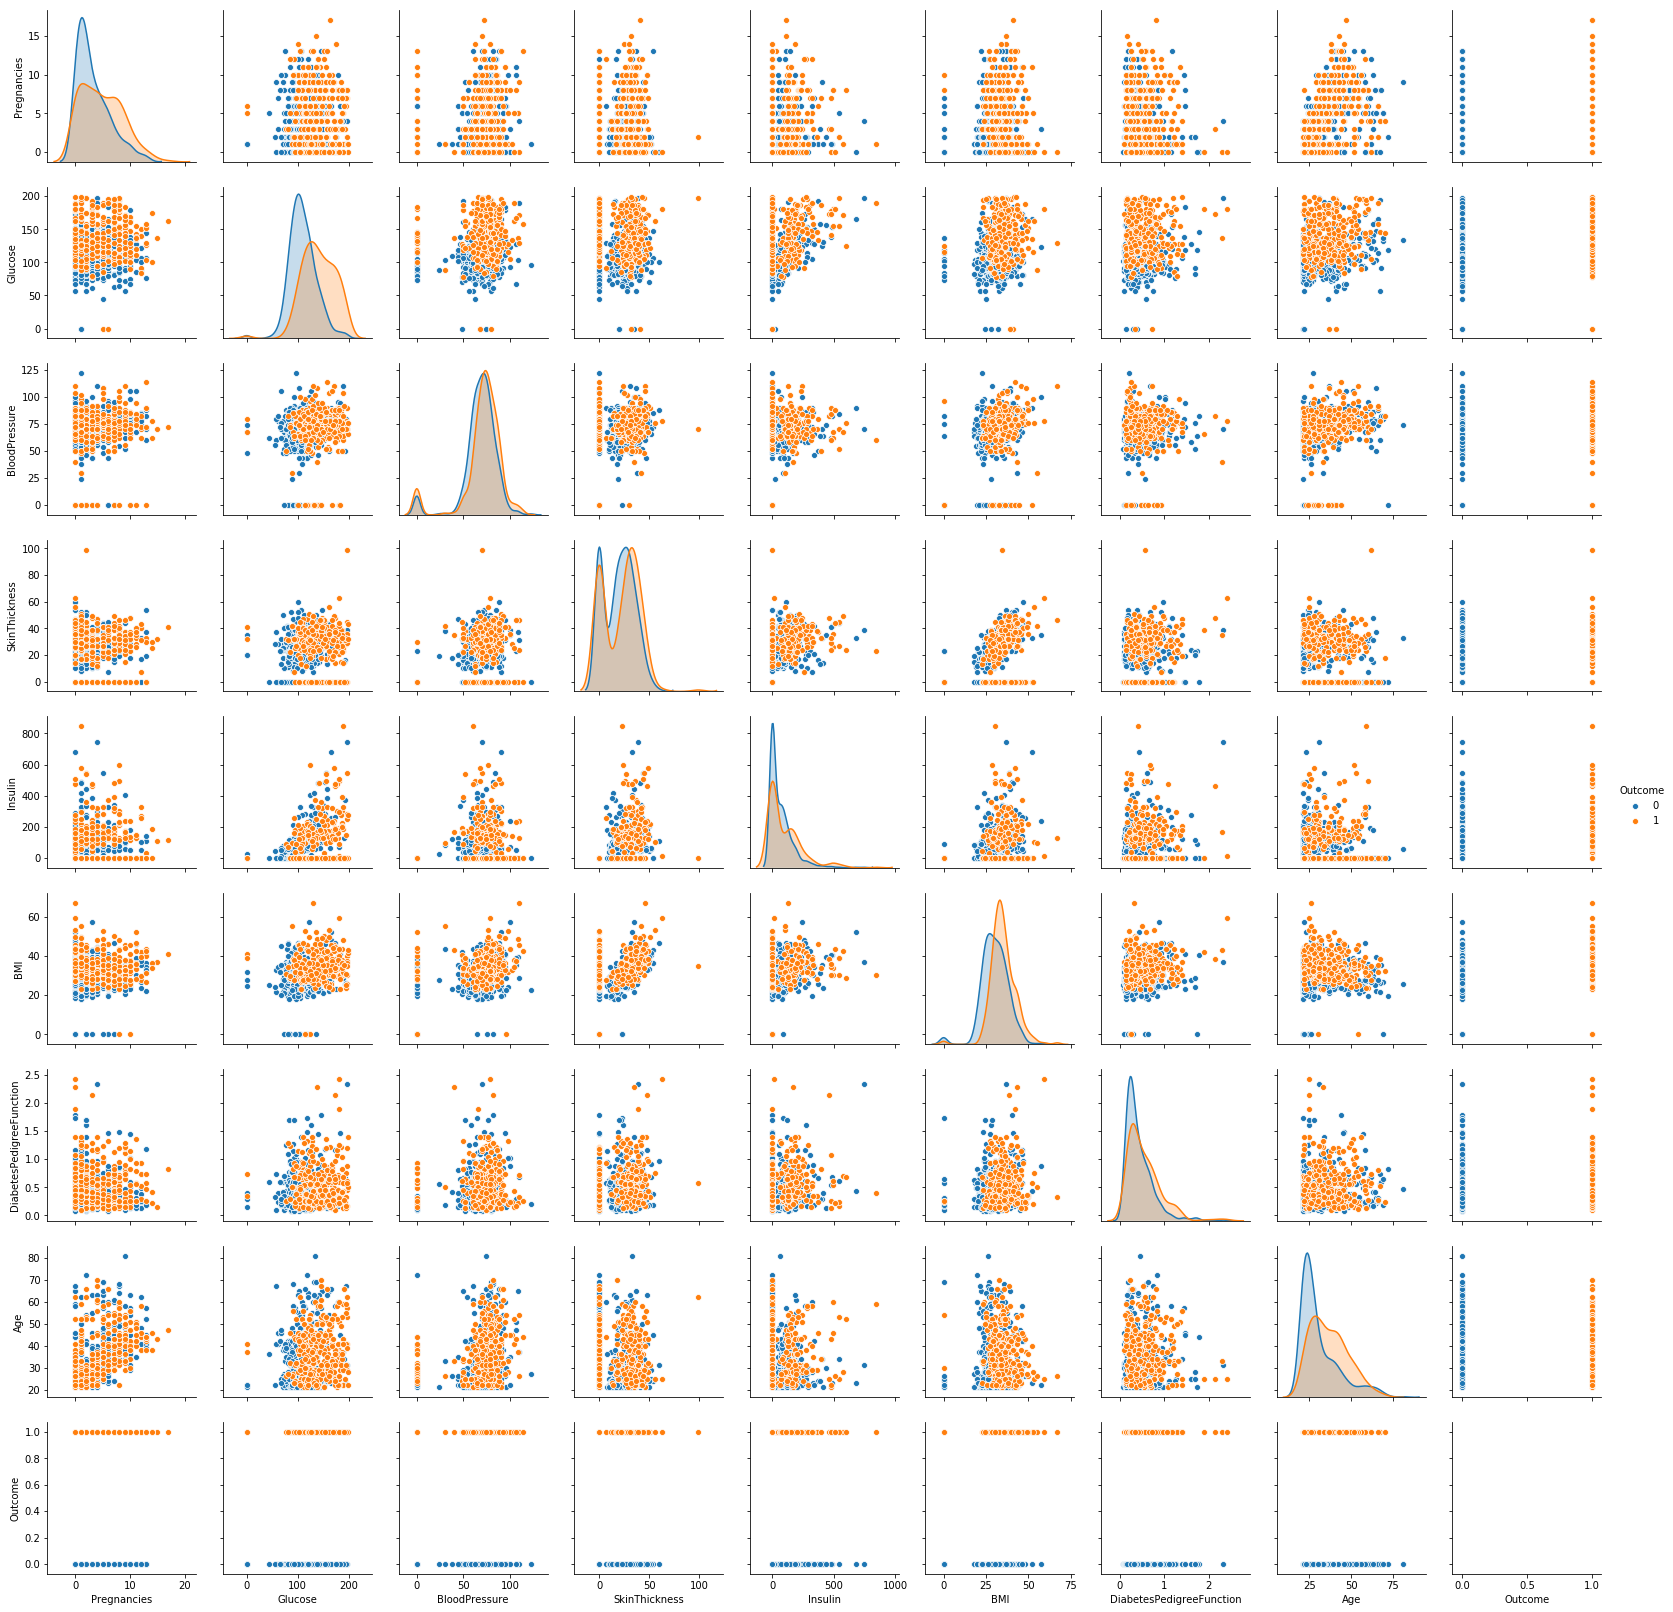

In [8]:
sb.pairplot(df, diag_kind = 'kde', hue = "Outcome")

In [9]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [10]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [11]:
for i in df.columns[:-1]:
    c = 0
    for j in df[i]:
        if(j==0):
            c+=1
    print("No. of zeros in column",i,"are :",c)

No. of zeros in column Pregnancies are : 111
No. of zeros in column Glucose are : 5
No. of zeros in column BloodPressure are : 35
No. of zeros in column SkinThickness are : 227
No. of zeros in column Insulin are : 374
No. of zeros in column BMI are : 11
No. of zeros in column DiabetesPedigreeFunction are : 0
No. of zeros in column Age are : 0


In [12]:
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [13]:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We have to standardize the data as the values of variables vary vastly in terms of variance. In here we can see that DiabetesPedigreeFunction has max of 2.42 while Insulin has 846. This makes the model biased towards the variables with greater values.

In [15]:
scaled_df = preprocessing.scale(df)

C:\Users\ACER\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [16]:
scaled_df

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  2.0158134 , -0.69530596, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [17]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [18]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896


In [19]:
scaled_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,7.956598e-16,-3.330669e-16,3.515706e-16,2.451743e-16,1.931325e-16,7.401487e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.665945e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,-7.321202e-01
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-4.007289e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,-7.321202e-01
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-3.345079e-16,-8.363615e-03,-3.001282e-01,-3.608474e-01,-7.321202e-01
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-3.345079e-16,6.029301e-01,4.662269e-01,6.602056e-01,1.365896e+00
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.126238e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.365896e+00


In [20]:
scaled_df['Outcome'] = df["Outcome"]

In [21]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


In [22]:
df = scaled_df
df.describe().loc[['mean', 'std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


C:\Users\ACER\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ACER\Anaconda3\envs\tf\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\ACER\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


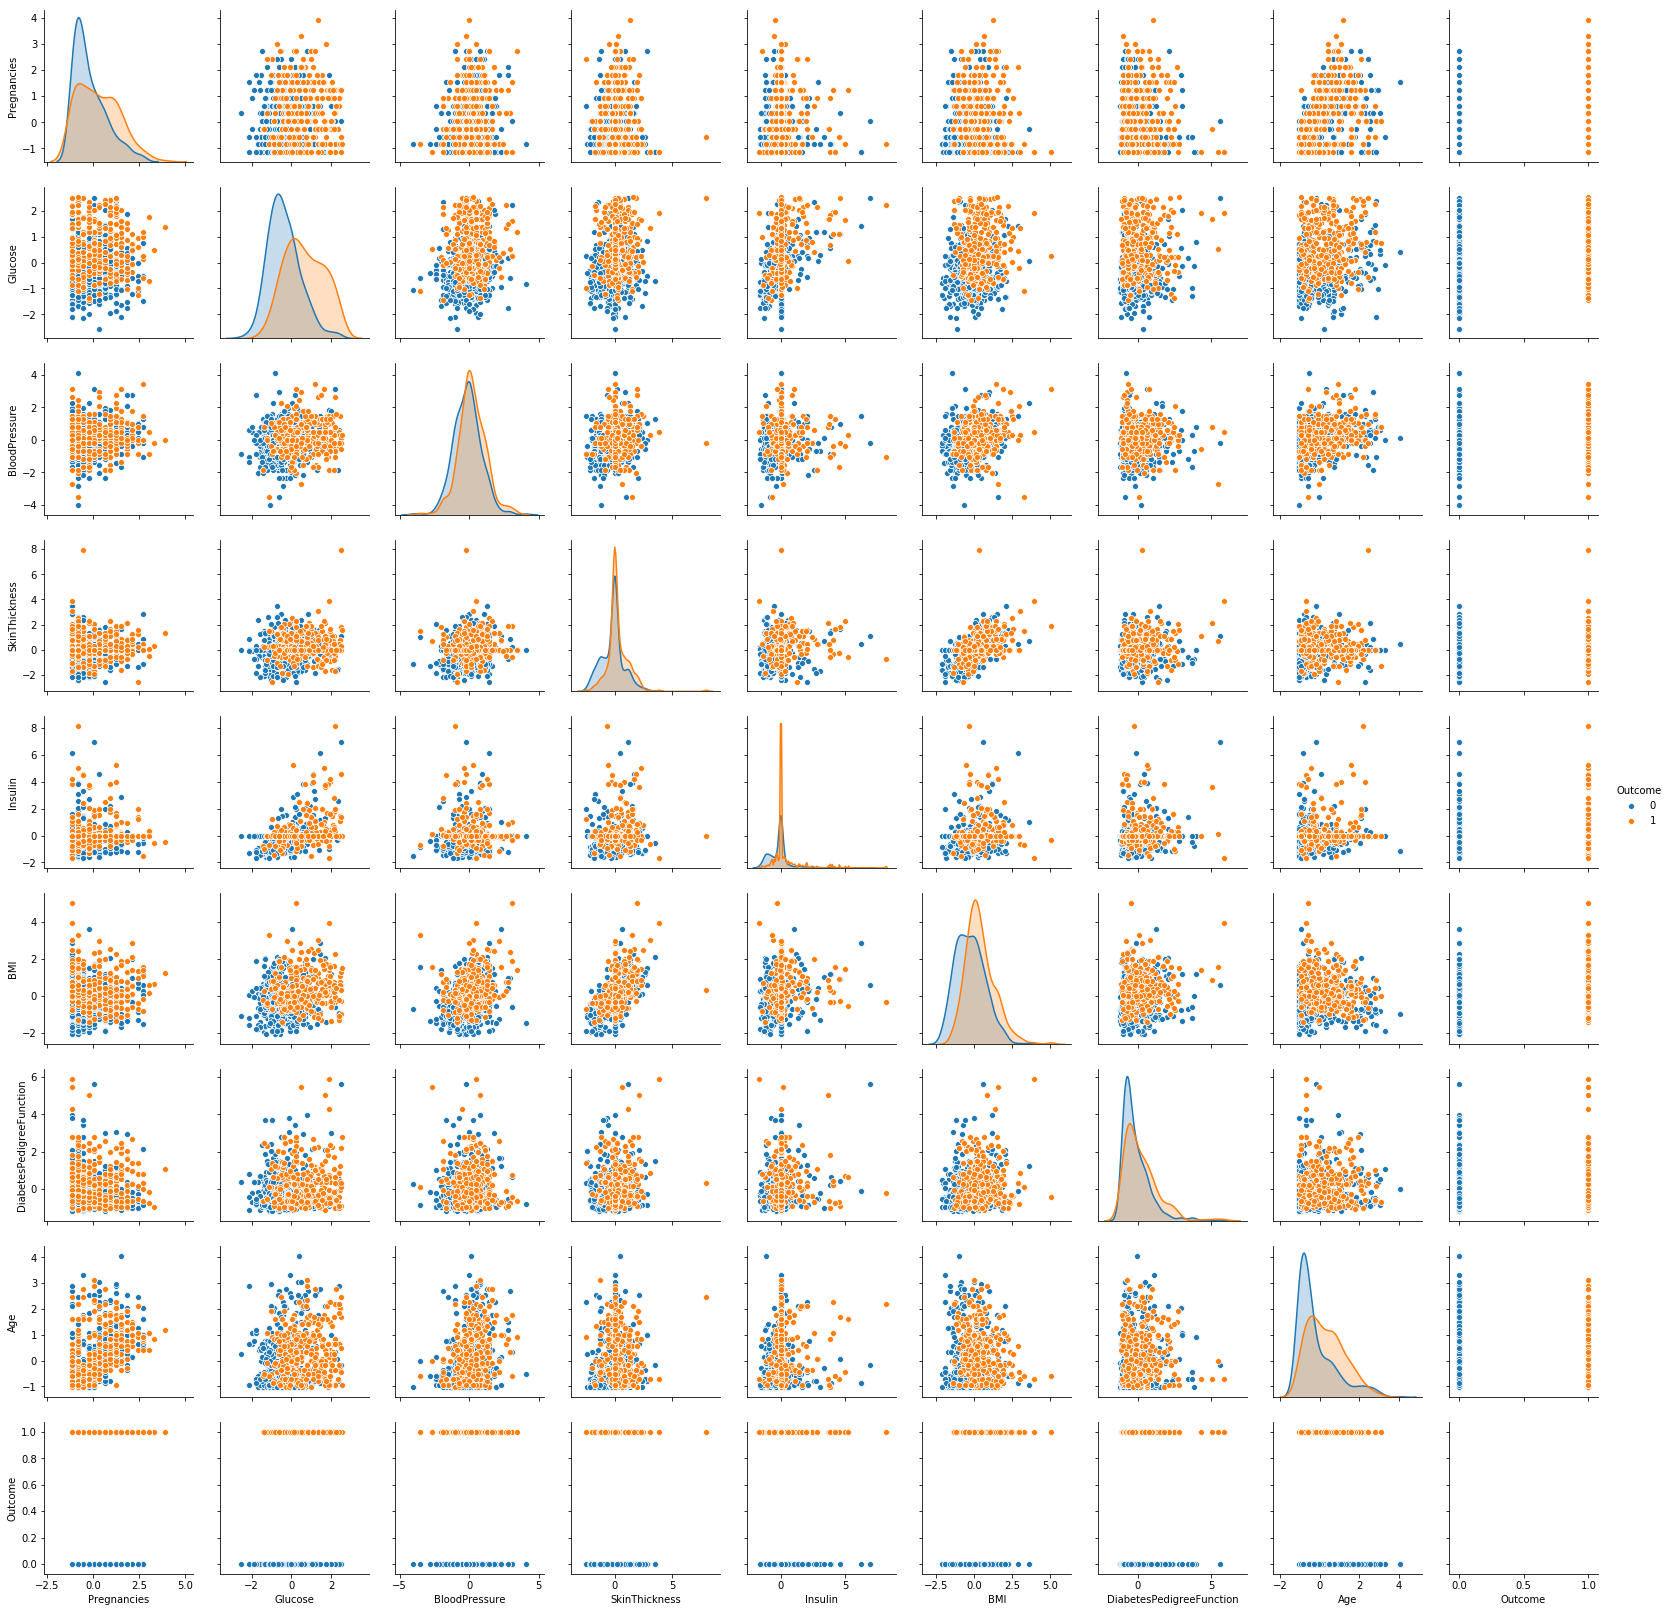

In [23]:
sb.pairplot(df, hue = "Outcome");

In [48]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'Outcome']
y = df.loc[:, 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [49]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# Add the first hidden layer
model.add(Dense(32, activation='relu', input_dim=8))
# Add the second hidden layer
model.add(Dense(16, activation='relu'))
# Add the output layer
model.add(Dense(1, activation='sigmoid'));

In [50]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']);

In [54]:
# Train the model for 200 epochs
model.fit(X_train, y_train, epochs=200);

Epoch 1/200
491/491 [==============================] - 0s 201us/step - loss: 0.3040 - acc: 0.8635
Epoch 2/200
491/491 [==============================] - 0s 191us/step - loss: 0.3027 - acc: 0.8717
Epoch 3/200
491/491 [==============================] - 0s 171us/step - loss: 0.3026 - acc: 0.8717
Epoch 4/200
491/491 [==============================] - 0s 189us/step - loss: 0.3000 - acc: 0.8697
Epoch 5/200
491/491 [==============================] - 0s 227us/step - loss: 0.2978 - acc: 0.8717
Epoch 6/200
491/491 [==============================] - 0s 209us/step - loss: 0.2966 - acc: 0.8697
Epoch 7/200
491/491 [==============================] - 0s 213us/step - loss: 0.2966 - acc: 0.8717
Epoch 8/200
491/491 [==============================] - 0s 225us/step - loss: 0.2938 - acc: 0.8737
Epoch 9/200
491/491 [==============================] - 0s 227us/step - loss: 0.2928 - acc: 0.8758
Epoch 10/200
491/491 [==============================] - 0s 230us/step - loss: 0.2907 - acc: 0.8758
Epoch 11/200
491/49

491/491 [==============================] - 0s 244us/step - loss: 0.1256 - acc: 0.9695
Epoch 165/200
491/491 [==============================] - 0s 262us/step - loss: 0.1240 - acc: 0.9695
Epoch 166/200
491/491 [==============================] - 0s 266us/step - loss: 0.1275 - acc: 0.9654
Epoch 167/200
491/491 [==============================] - 0s 268us/step - loss: 0.1249 - acc: 0.9674
Epoch 168/200
491/491 [==============================] - 0s 240us/step - loss: 0.1230 - acc: 0.9695
Epoch 169/200
491/491 [==============================] - 0s 231us/step - loss: 0.1214 - acc: 0.9715
Epoch 170/200
491/491 [==============================] - 0s 232us/step - loss: 0.1210 - acc: 0.9695
Epoch 171/200
491/491 [==============================] - 0s 227us/step - loss: 0.1206 - acc: 0.9715
Epoch 172/200
491/491 [==============================] - ETA: 0s - loss: 0.1170 - acc: 0.973 - 0s 270us/step - loss: 0.1196 - acc: 0.9715
Epoch 173/200
491/491 [==============================] - 0s 314us/step - los

In [55]:
scores = model.evaluate(X_train, y_train)
print("Training accuracy :",(scores[1]*100).round(2))

491/491 [==============================] - 0s 116us/step
Training accuracy : 97.76


In [56]:
scores = model.evaluate(X_test, y_test)
print("Testing accuracy :",(scores[1]*100).round(2))

154/154 [==============================] - 0s 155us/step
Testing accuracy : 70.78


In [57]:
from sklearn.metrics import confusion_matrix

y_test_pred = model.predict_classes(X_test)
c_matrix = confusion_matrix(y_test, y_test_pred)

In [58]:
c_matrix

array([[75, 18],
       [27, 34]], dtype=int64)

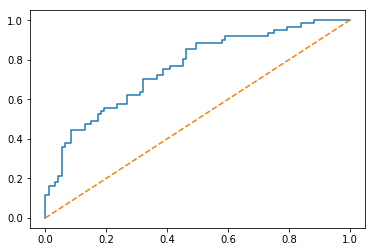

In [60]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1], '--')



In [82]:
from sklearn.decomposition import PCA

pca = PCA(3)
projected = pca.fit_transform(df.loc[:, df.columns!='Outcome'])

In [83]:
projected.shape

(768, 3)

In [97]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svm = SVC(C = 1, kernel = 'rbf', gamma = 0.1)
svm_scores = cross_val_score(svm, projected, df["Outcome"], cv = 100, scoring = 'accuracy') 

In [98]:
svm_scores.mean()

0.7521428571428569